### ACS visualizations
    

show the relationship between connectivity and various socio-economic stats, like:
- race
- unemployment rate
- median income
- hardship index
- CCVI

In [1]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')  # make sure we can import from our package

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gd 
import shapely
import matplotlib.pyplot as plt

In [3]:
chicago_df = pd.read_csv("../data/chicago_internet.csv",index_col=0,
                      parse_dates=[0])

In [12]:
community_df = pd.read_csv("../data/comm_areas.csv")[["AREA_NUM_1", "the_geom"]]
chicago_df = pd.merge(chicago_df, community_df, left_on="comm_num", right_on="AREA_NUM_1")
chicago_gdf = gd.GeoDataFrame(chicago_df, geometry=community_df["the_geom"].apply(lambda x: shapely.wkt.loads(x)))

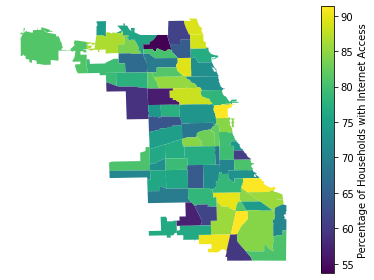

In [46]:
fig, ax = plt.subplots(1,1)#, figsize=(3,3))

chicago_gdf.plot("hh_internet(%)", legend=True, ax=ax, legend_kwds={'label': "Percentage of Households with Internet Access"})
ax.set_axis_off();
plt.tight_layout()
plt.savefig("../portal_data/Chicago_Internet.eps")


In [4]:
chicago_df

,name,comm_num,total_pop,total_households,hh_no_internet,hh_no_internet(%),hh_internet,hh_internet(%),internet_rr,hh_computer,...,total_hispanic(%),total_black,total_black(%),total_white,total_white(%),total_asian,total_asian(%),ccvi_score,ccvi_cat,hardship_score
0,Albany Park,14,49806,16909,2674,15.814064,13488,79.768171,95.582234,15104,...,44.972493,2461,4.941172,16040,32.204955,7391,14.839578,38.2,MEDIUM,53.0
1,Archer Heights,57,13726,3919,772,19.698903,2886,73.641235,93.340138,3207,...,77.415125,131,0.954393,2109,15.365001,819,5.966778,53.3,HIGH,67.0
2,Armour Square,34,13538,5396,1488,27.575982,3685,68.291327,95.867309,4064,...,4.321170,1135,8.383809,1878,13.872064,9886,73.024080,30.9,LOW,82.0
3,Ashburn,70,43356,13124,1840,14.020116,10449,79.617495,93.637610,11847,...,41.327613,19888,45.871390,4110,9.479657,410,0.945659,45.1,MEDIUM,37.0
4,Auburn Gresham,71,45909,17161,5282,30.779092,10394,60.567566,91.346658,13724,...,2.180400,43791,95.386526,524,1.141388,141,0.307129,48.2,HIGH,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,West Lawn,65,31886,9272,1752,18.895600,7094,76.509922,95.405522,7803,...,83.971022,845,2.650066,4028,12.632503,142,0.445337,48.5,HIGH,56.0
73,West Pullman,53,30020,10598,2176,20.532176,8101,76.438951,96.971127,8972,...,5.203198,27579,91.868754,290,0.966023,0,0.000000,49.2,HIGH,62.0
74,West Ridge,2,78466,25714,3676,14.295714,20875,81.181458,95.477172,23515,...,18.906278,9086,11.579538,31836,40.572987,18650,23.768256,36.0,MEDIUM,46.0
75,West Town,24,83757,37819,3187,8.426981,33590,88.817790,97.244771,35289,...,22.167699,5727,6.837637,53095,63.391717,4125,4.924961,18.2,LOW,10.0


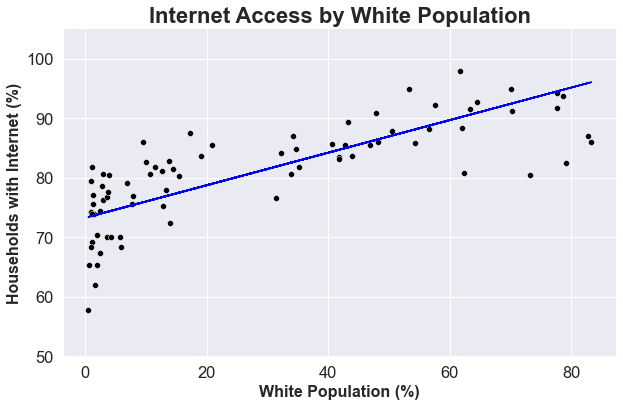

In [9]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_white(%)"]

sns.set(font_scale = 1.5)

sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.title("Internet Access by White Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('White Population (%)', size=16, weight=900)

plt.ylim(50, 105)
plt.tight_layout()
plt.savefig("../portal_data/access_white.svg")

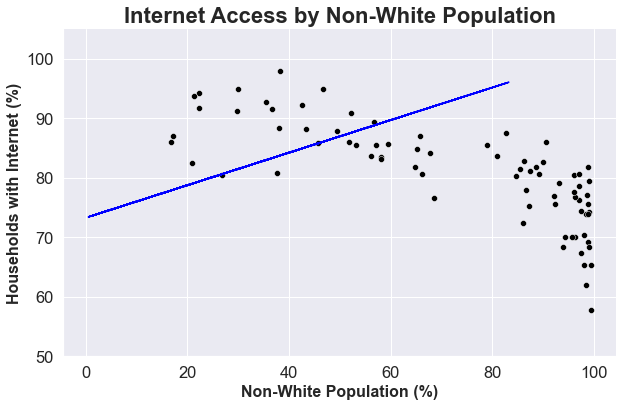

In [10]:
Population_Size = chicago_df["total_pop"]

chicago_df["hh_with_internet"]=100 - chicago_df["hh_no_internet(%)"]
chicago_df["non_white"]=100-chicago_df["total_white(%)"]

sns.set(font_scale = 1.5)

g= sns.relplot(x="non_white", y="hh_with_internet",
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Non-White Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Non-White Population (%)', size=16, weight=900)
plt.tight_layout()
plt.savefig("../portal_data/access_non_white.svg")

In [7]:
chicago_df.columns

Index(['name', 'comm_num', 'total_pop', 'total_households', 'hh_no_internet',
       'hh_no_internet(%)', 'hh_internet', 'hh_internet(%)', 'internet_rr',
       'hh_computer', 'hh_computer(%)', 'hh_no_computer', 'hh_no_computer(%)',
       'computer_rr', 'hh_broadband', 'hh_broadband(%)', 'hh_poverty(%)',
       'hh_unemployment(%)', 'hh_median_income', 'total_hispanic',
       'total_hispanic(%)', 'total_black', 'total_black(%)', 'total_white',
       'total_white(%)', 'total_asian', 'total_asian(%)', 'ccvi_score',
       'ccvi_cat', 'hardship_score', 'hh_with_internet', 'non_white'],
      dtype='object')

In [16]:
subset_fields = ["name", "total_black(%)", "hh_with_internet", "ccvi_score", "hardship_score", "hh_median_income"]
chicago_df[subset_fields].to_csv("../portal_data/community_features.csv")
#chicago_df

Text(0.5, 15.439999999999998, 'Asian Population (%)')

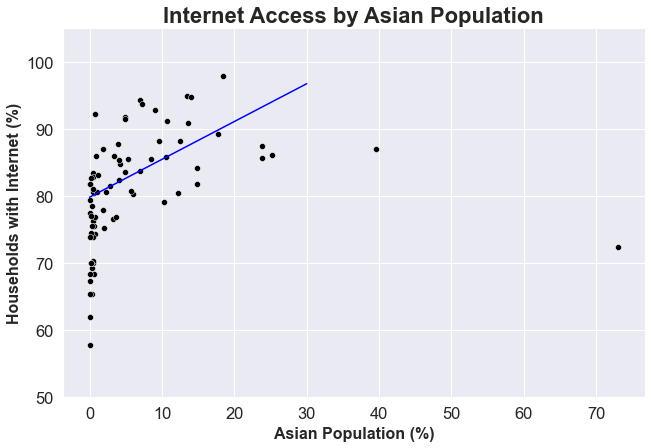

In [7]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_asian(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(np.array([0,30]), a*np.array([0,30])+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Asian Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Asian Population (%)', size=16, weight=900)

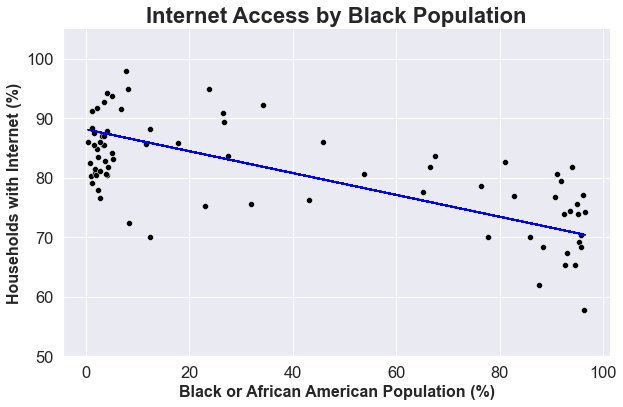

In [11]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_black(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Black Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Black or African American Population (%)', size=16, weight=900)
plt.tight_layout()
plt.savefig("../portal_data/access_black.svg")

Text(0.5, 15.439999999999998, 'Hispanic Population (%)')

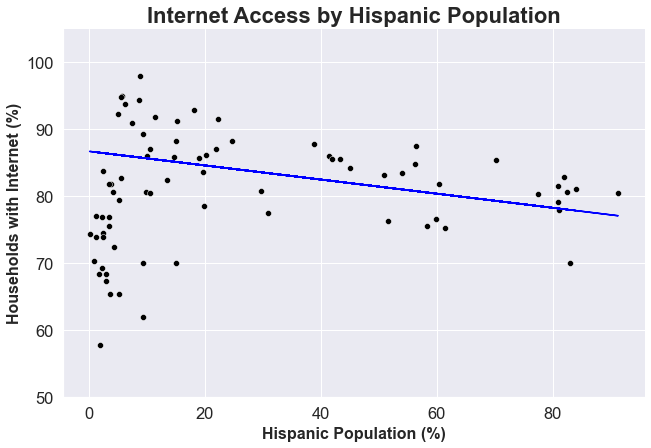

In [9]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_hispanic(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y, 
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Hispanic Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Hispanic Population (%)', size=16, weight=900)

Text(0.5, 15.439999999999998, 'Unemployment Rate (%)')

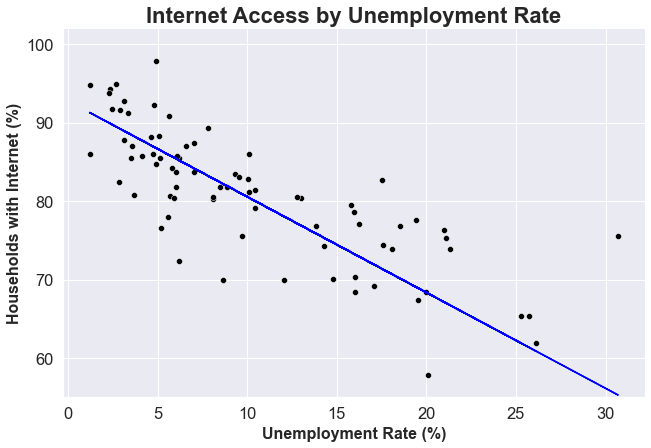

In [10]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["hh_unemployment(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, 102)

plt.title("Internet Access by Unemployment Rate" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Unemployment Rate (%)', size=16, weight=900)

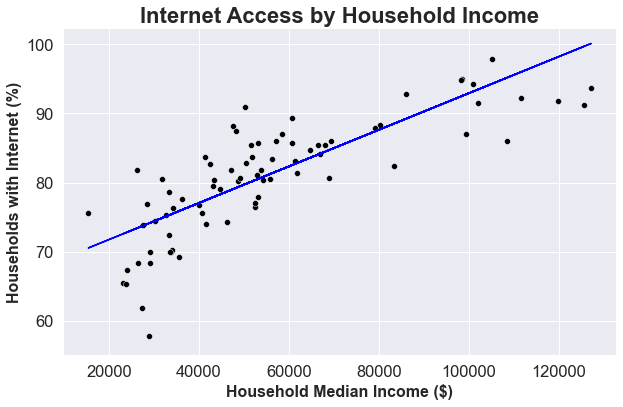

In [12]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["hh_median_income"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, None)

plt.title("Internet Access by Household Income" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Household Median Income ($)', size=16, weight=900)
plt.tight_layout()
plt.savefig("../portal_data/access_income.svg")

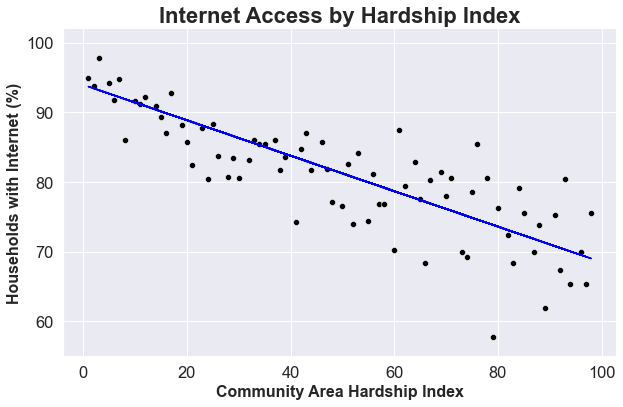

In [13]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["hardship_score"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, 102)

plt.title("Internet Access by Hardship Index" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Community Area Hardship Index', size=16, weight=900)
plt.tight_layout()
plt.savefig("../portal_data/access_hardship_index.svg")

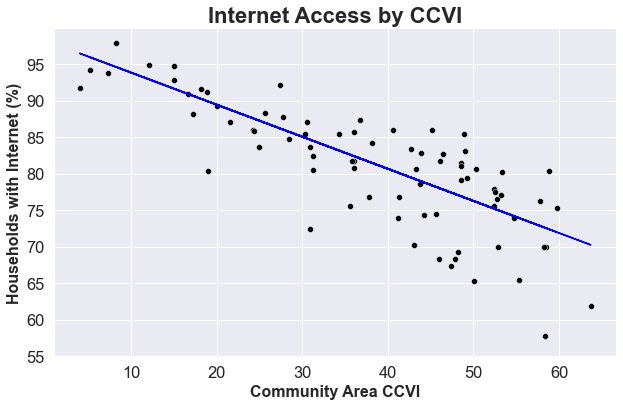

In [14]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["ccvi_score"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(500, 800), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, None)

plt.title("Internet Access by CCVI" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Community Area CCVI', size=16, weight=900)
plt.tight_layout()
plt.savefig("../portal_data/access_ccvi.svg")

In [25]:
gdf = gd.read_file("../geo/community_areas.shp")
df = pd.DataFrame(gdf)
df = df[["area_num_1", "geometry"]]
df["area_num_1"] = df["area_num_1"].apply(lambda x: int(x))

In [33]:
chicago_df

,name,comm_num,total_pop,total_households,hh_no_internet,hh_no_internet(%),hh_internet,hh_internet(%),internet_rr,hh_computer,...,total_black(%),total_white,total_white(%),total_asian,total_asian(%),ccvi_score,ccvi_cat,hardship_score,hh_with_internet,non_white
0,Albany Park,14,49806,16909,2674,15.814064,13488,79.768171,95.582234,15104,...,4.941172,16040,32.204955,7391,14.839578,38.2,MEDIUM,53.0,84.185936,67.795045
1,Archer Heights,57,13726,3919,772,19.698903,2886,73.641235,93.340138,3207,...,0.954393,2109,15.365001,819,5.966778,53.3,HIGH,67.0,80.301097,84.634999
2,Armour Square,34,13538,5396,1488,27.575982,3685,68.291327,95.867309,4064,...,8.383809,1878,13.872064,9886,73.024080,30.9,LOW,82.0,72.424018,86.127936
3,Ashburn,70,43356,13124,1840,14.020116,10449,79.617495,93.637610,11847,...,45.871390,4110,9.479657,410,0.945659,45.1,MEDIUM,37.0,85.979884,90.520343
4,Auburn Gresham,71,45909,17161,5282,30.779092,10394,60.567566,91.346658,13724,...,95.386526,524,1.141388,141,0.307129,48.2,HIGH,74.0,69.220908,98.858612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,West Lawn,65,31886,9272,1752,18.895600,7094,76.509922,95.405522,7803,...,2.650066,4028,12.632503,142,0.445337,48.5,HIGH,56.0,81.104400,87.367497
73,West Pullman,53,30020,10598,2176,20.532176,8101,76.438951,96.971127,8972,...,91.868754,290,0.966023,0,0.000000,49.2,HIGH,62.0,79.467824,99.033977
74,West Ridge,2,78466,25714,3676,14.295714,20875,81.181458,95.477172,23515,...,11.579538,31836,40.572987,18650,23.768256,36.0,MEDIUM,46.0,85.704286,59.427013
75,West Town,24,83757,37819,3187,8.426981,33590,88.817790,97.244771,35289,...,6.837637,53095,63.391717,4125,4.924961,18.2,LOW,10.0,91.573019,36.608283


In [26]:
df_merge = pd.merge(chicago_df, df, left_on="comm_num", right_on="area_num_1")

In [44]:
gdf_merge = gd.GeoDataFrame(df_merge, geometry=df_merge["geometry"])
gdf_merge = gdf_merge[["hh_internet(%)", "comm_num", "geometry"]]
print(gdf_merge.columns)

Index(['hh_internet(%)', 'comm_num', 'geometry'], dtype='object')


In [45]:
gdf_merge.to_file("../portal_data/access_neighborhood.geojson", driver="GeoJSON")

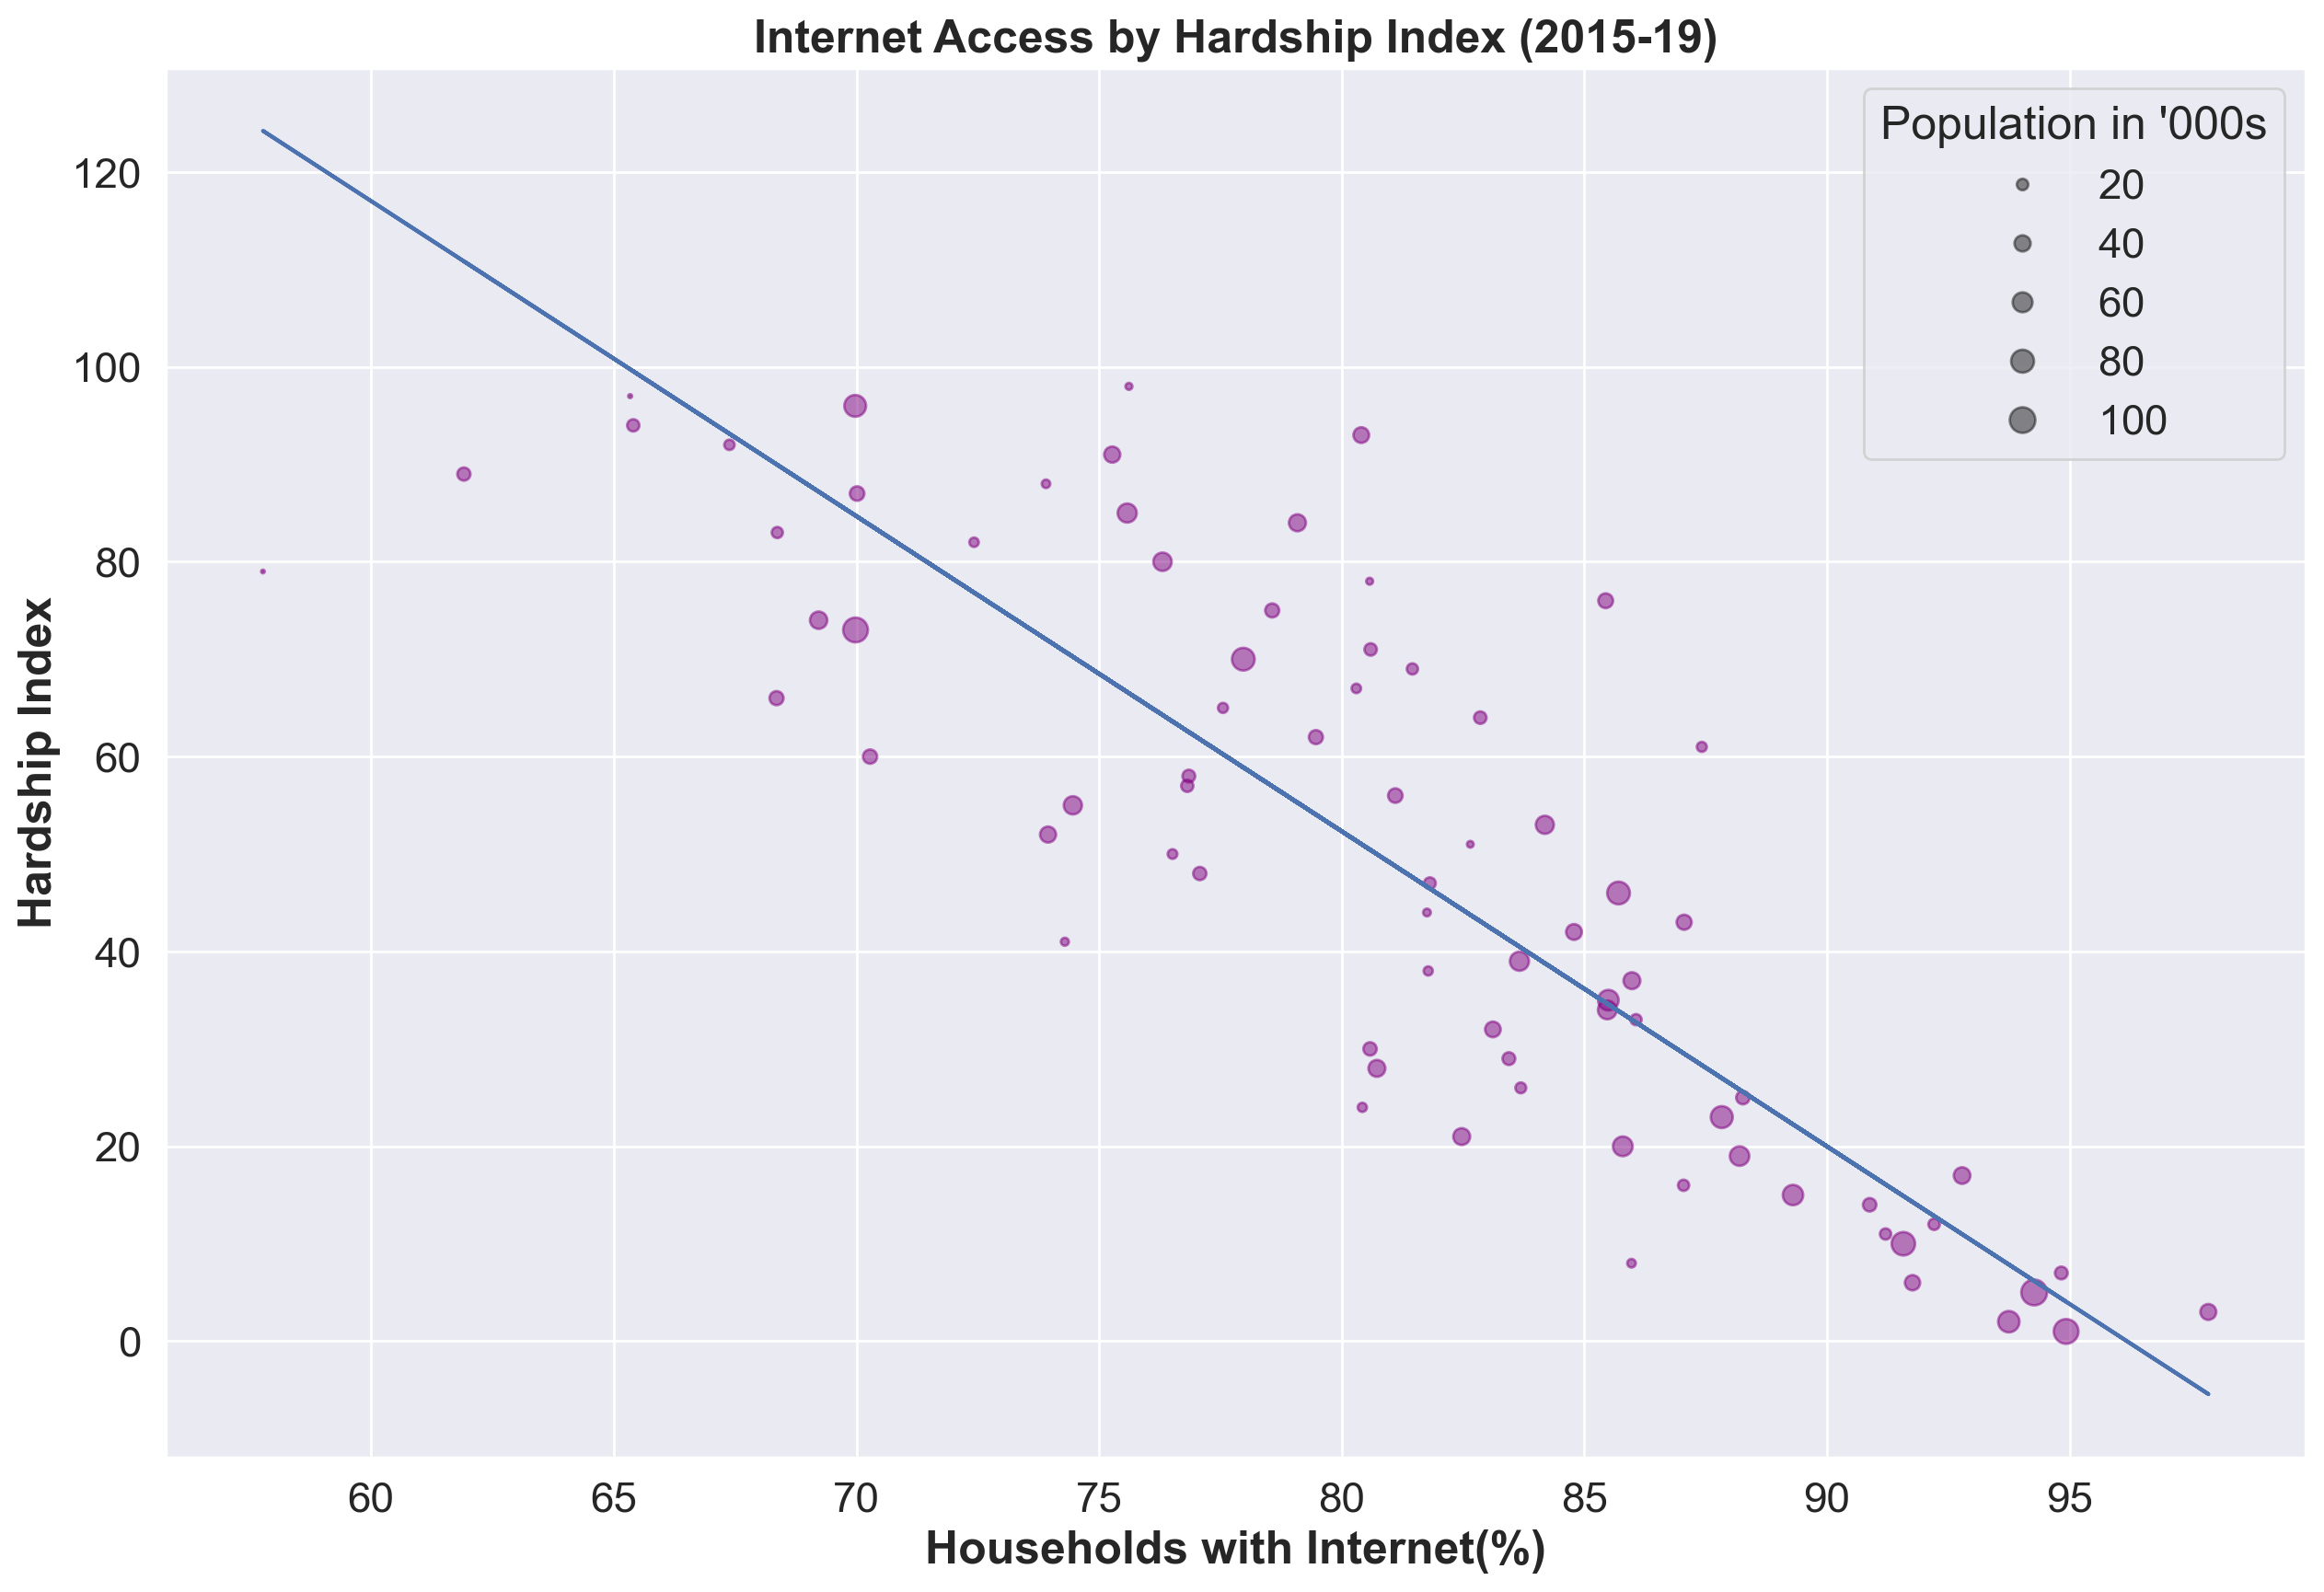

In [14]:
plt.figure(figsize=(15, 10), dpi=200)
x=100-chicago_df["hh_no_internet(%)"]
y=chicago_df["hardship_score"]

scatter = plt.scatter(x=100-chicago_df["hh_no_internet(%)"],
            y=chicago_df["hardship_score"],
           c="purple", alpha=0.5, s=chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet(%)",weight = "bold")
plt.ylabel("Hardship Index",weight = "bold")
plt.title("Internet Access by Hardship Index (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

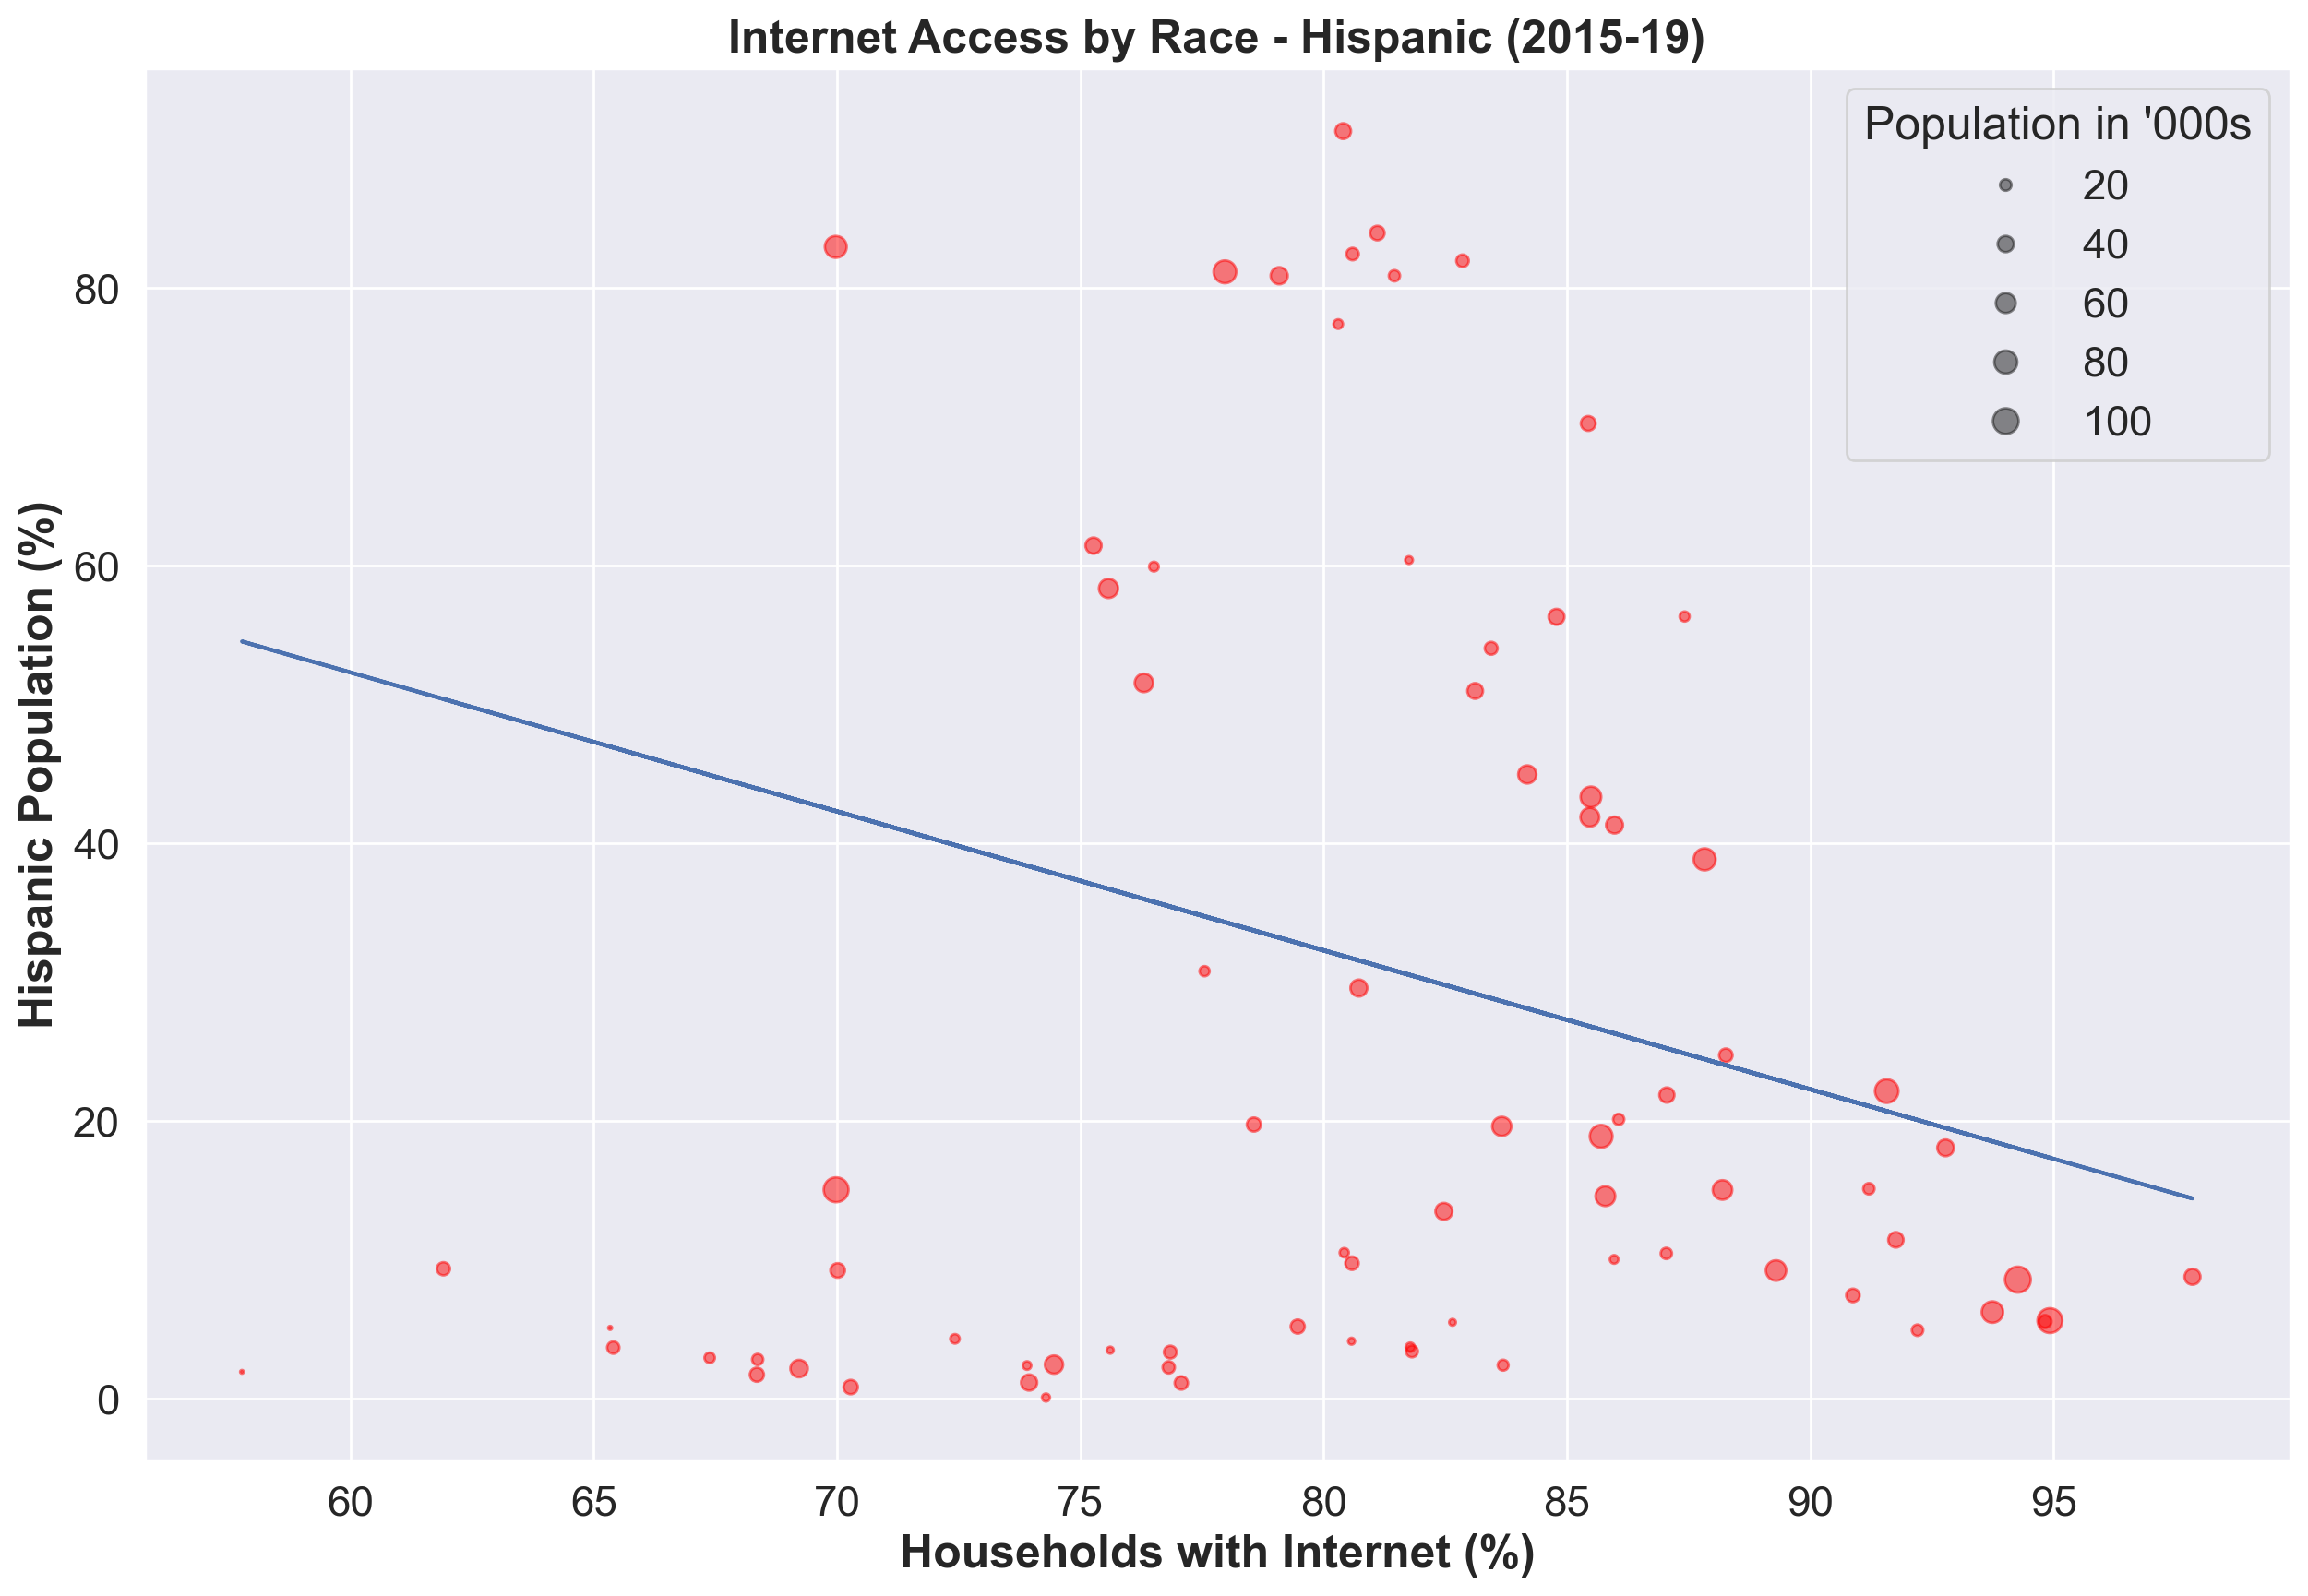

In [15]:
plt.figure(figsize=(15, 10), dpi=200)

x=100 -chicago_df["hh_no_internet(%)"]
y=chicago_df["total_hispanic(%)"]

scatter = plt.scatter(x=100 -chicago_df["hh_no_internet(%)"],
            y=chicago_df["total_hispanic(%)"],
           c="red", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)
plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("Hispanic Population (%)",weight = "bold")
plt.title("Internet Access by Race - Hispanic (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

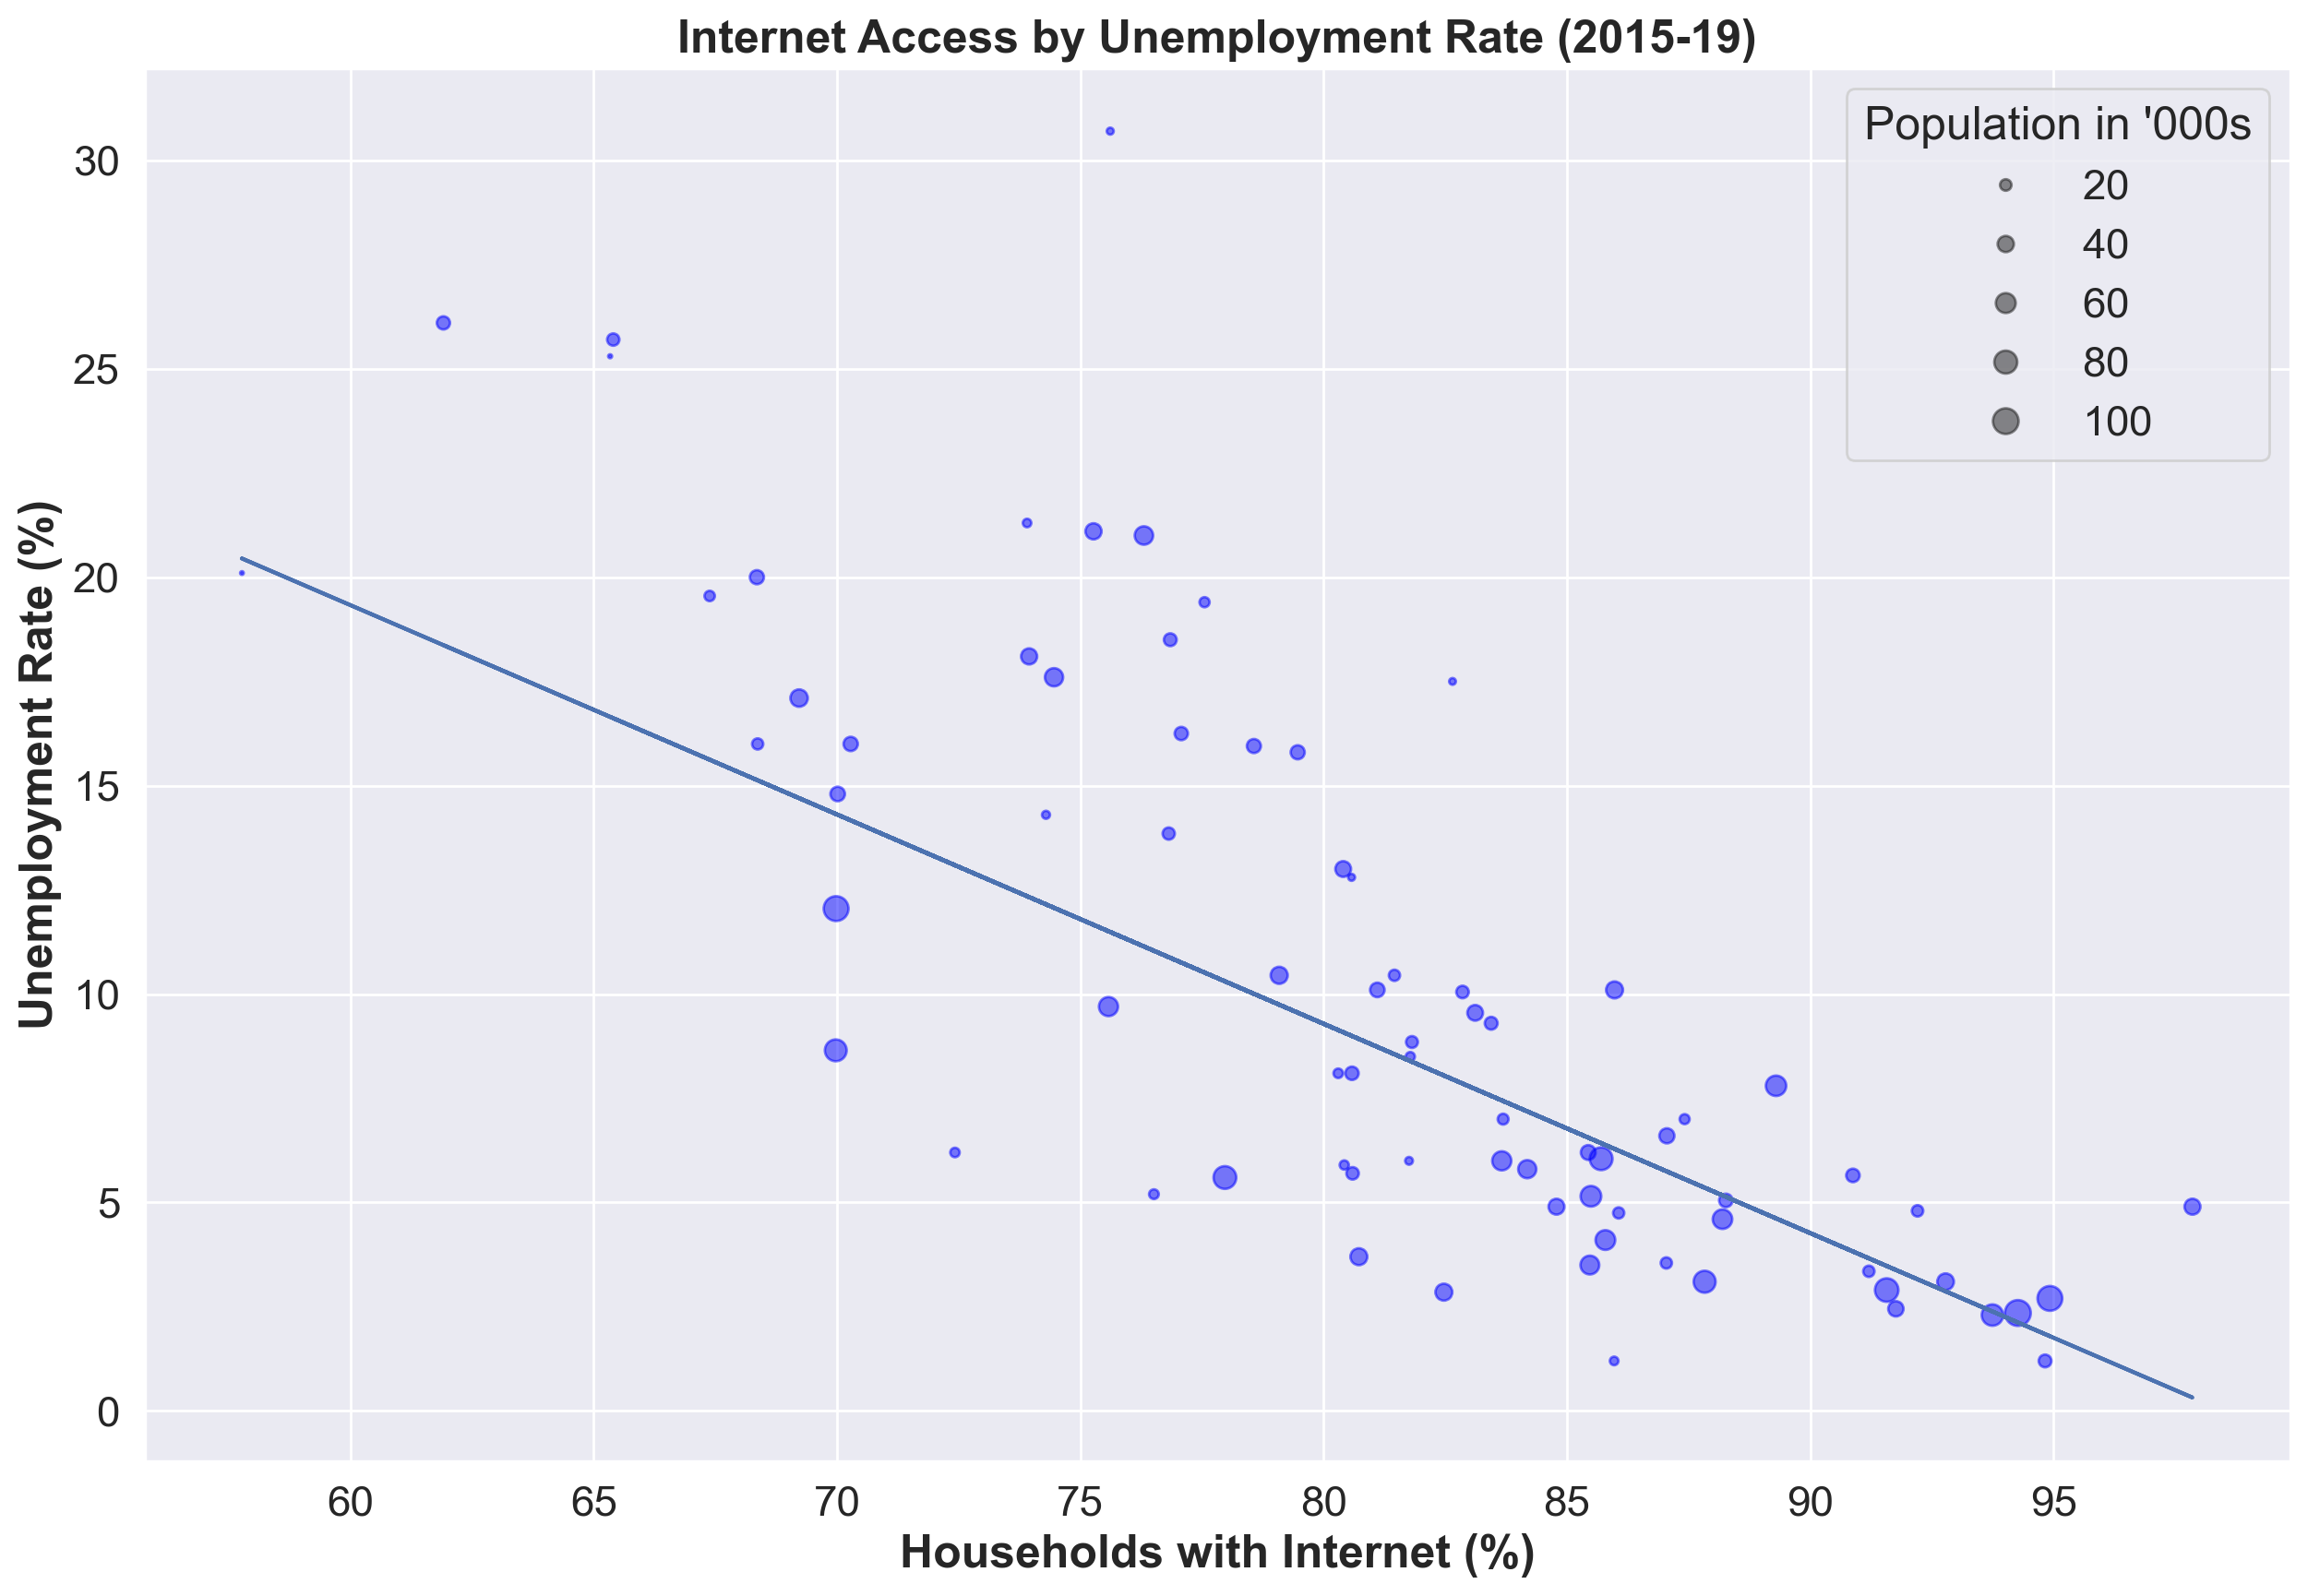

In [16]:
plt.figure(figsize=(15, 10), dpi=200)

x=100-chicago_df["hh_no_internet(%)"]
y=chicago_df["hh_unemployment(%)"]

scatter = plt.scatter(x=100-chicago_df["hh_no_internet(%)"],
            y=chicago_df["hh_unemployment(%)"],
           c="blue", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("Unemployment Rate (%)",weight = "bold")
plt.title("Internet Access by Unemployment Rate (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

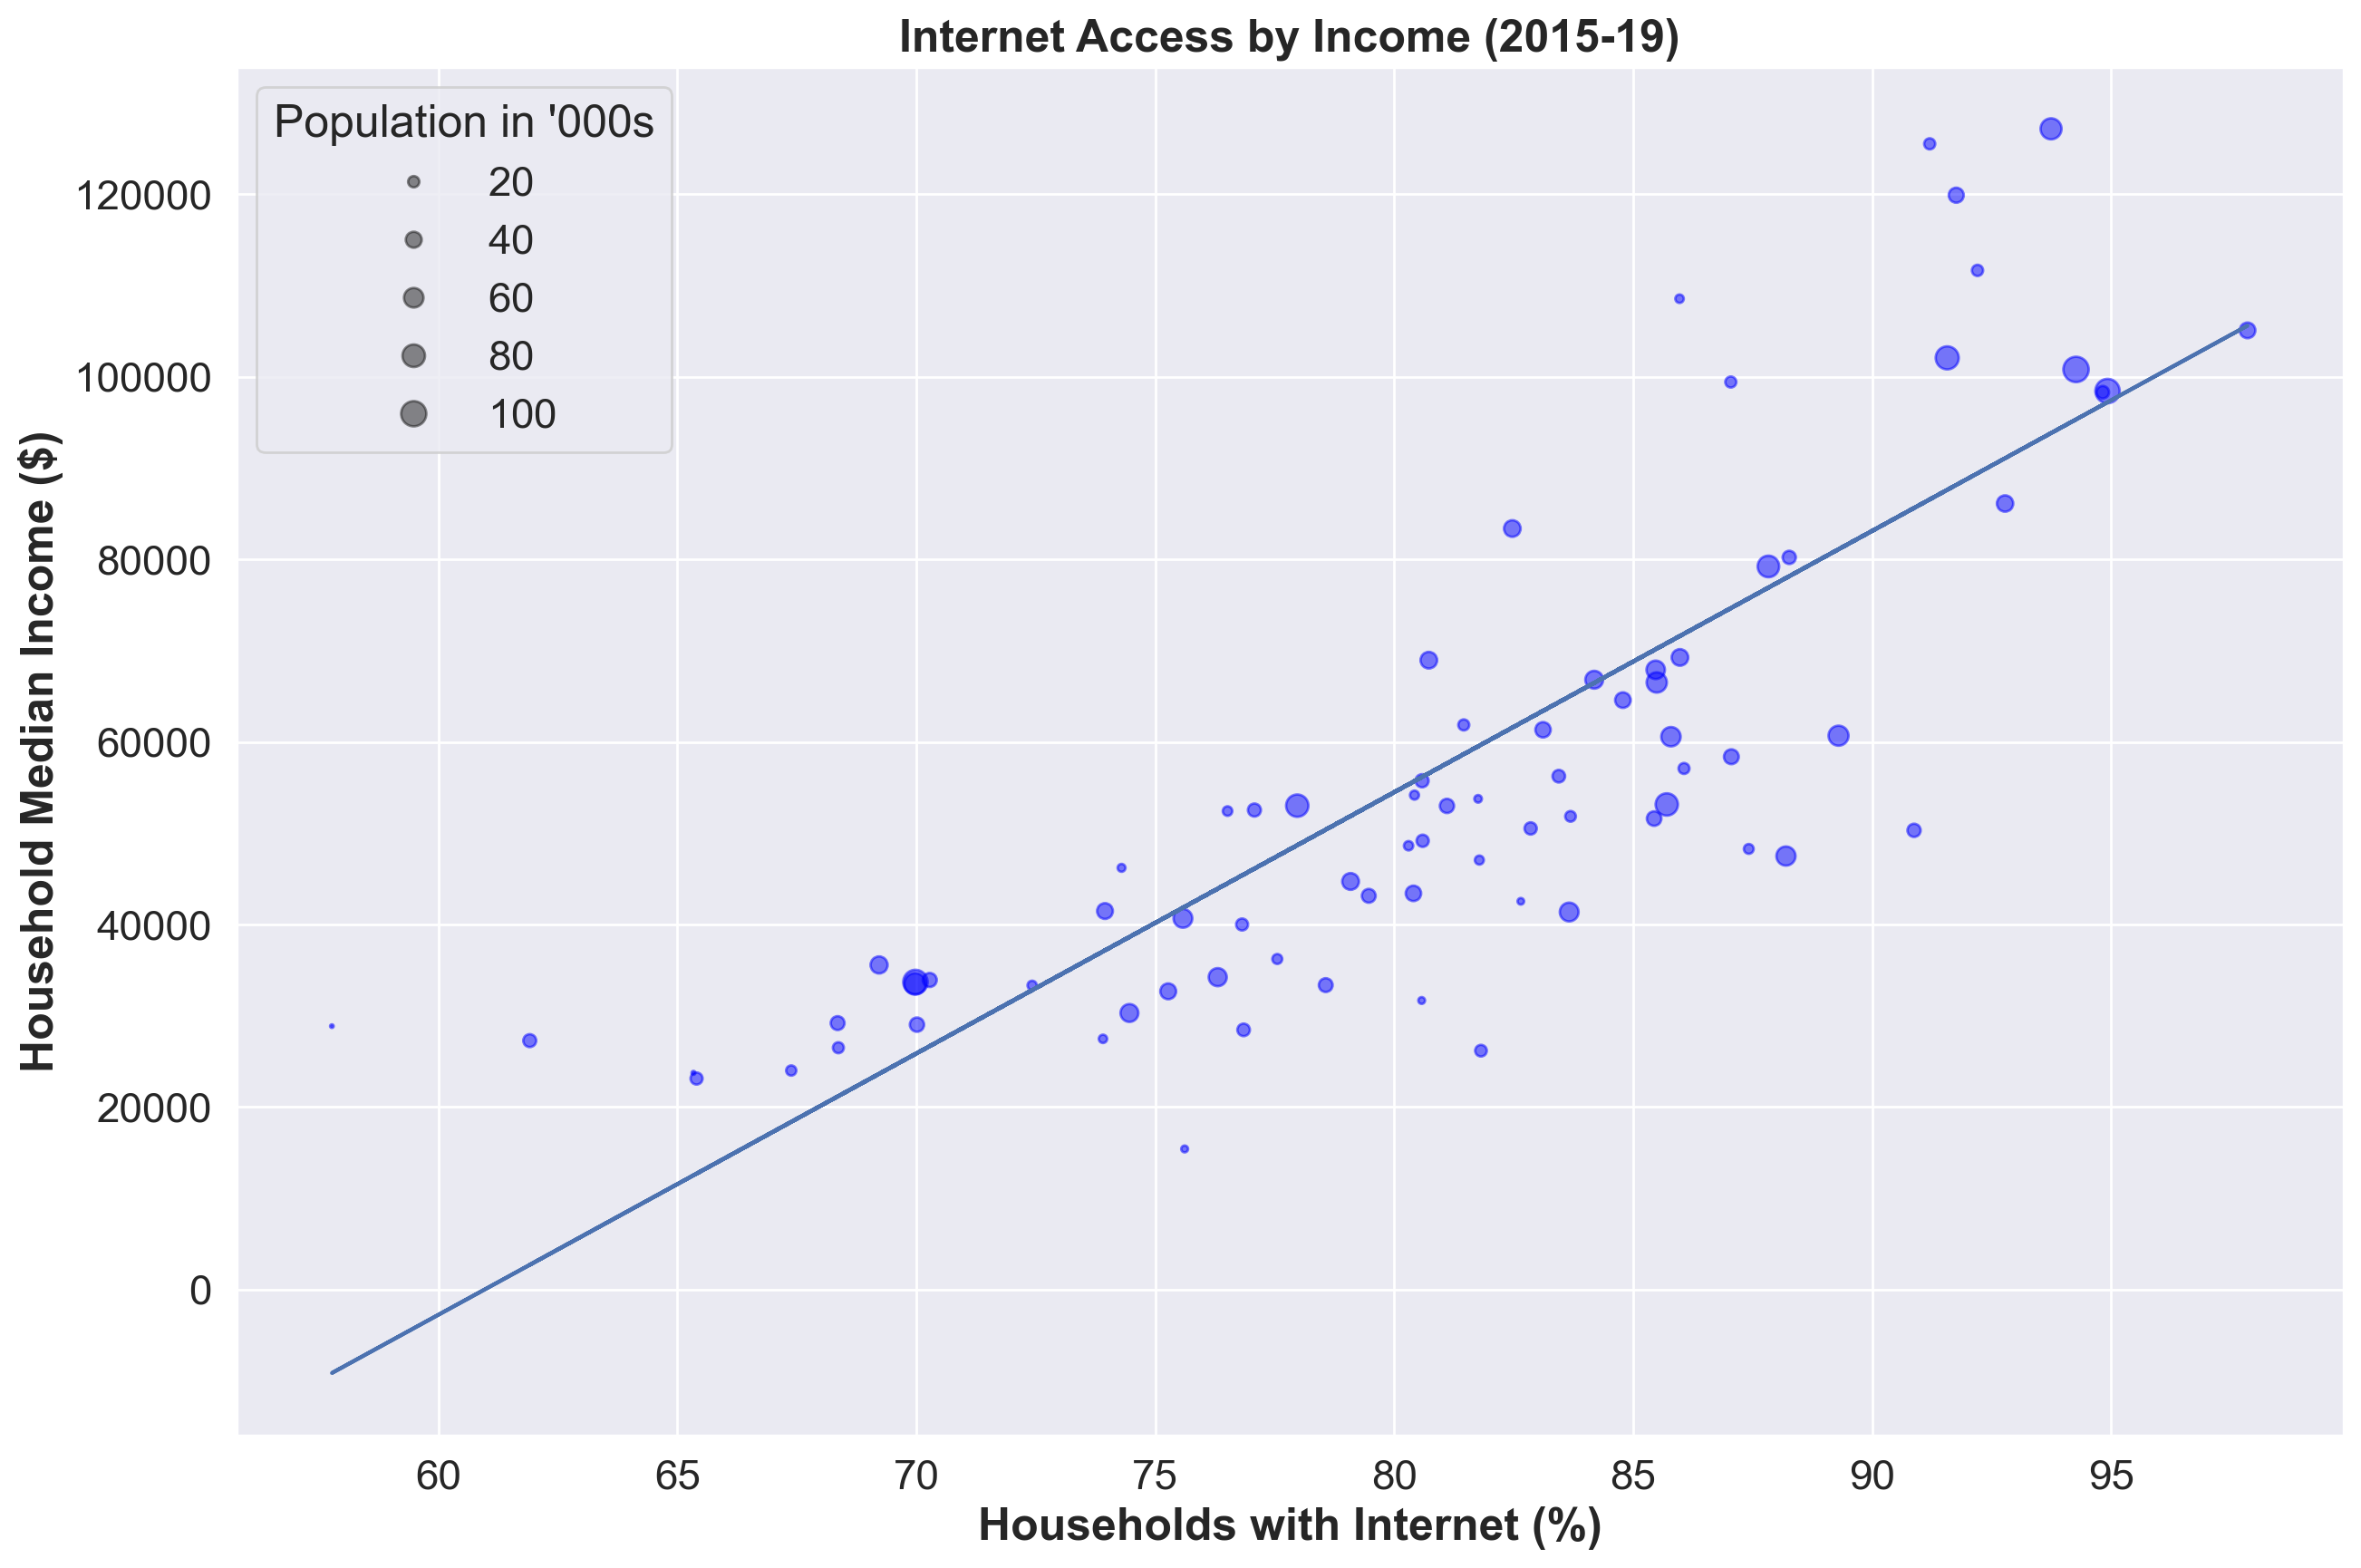

In [17]:
plt.figure(figsize=(15, 10), dpi=200)

x=100-chicago_df["hh_no_internet(%)"]
y=chicago_df["hh_median_income"]

scatter = plt.scatter(x=100-chicago_df["hh_no_internet(%)"],
            y=chicago_df["hh_median_income"],
           c="blue", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("Household Median Income ($)",weight = "bold")
plt.title("Internet Access by Income (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

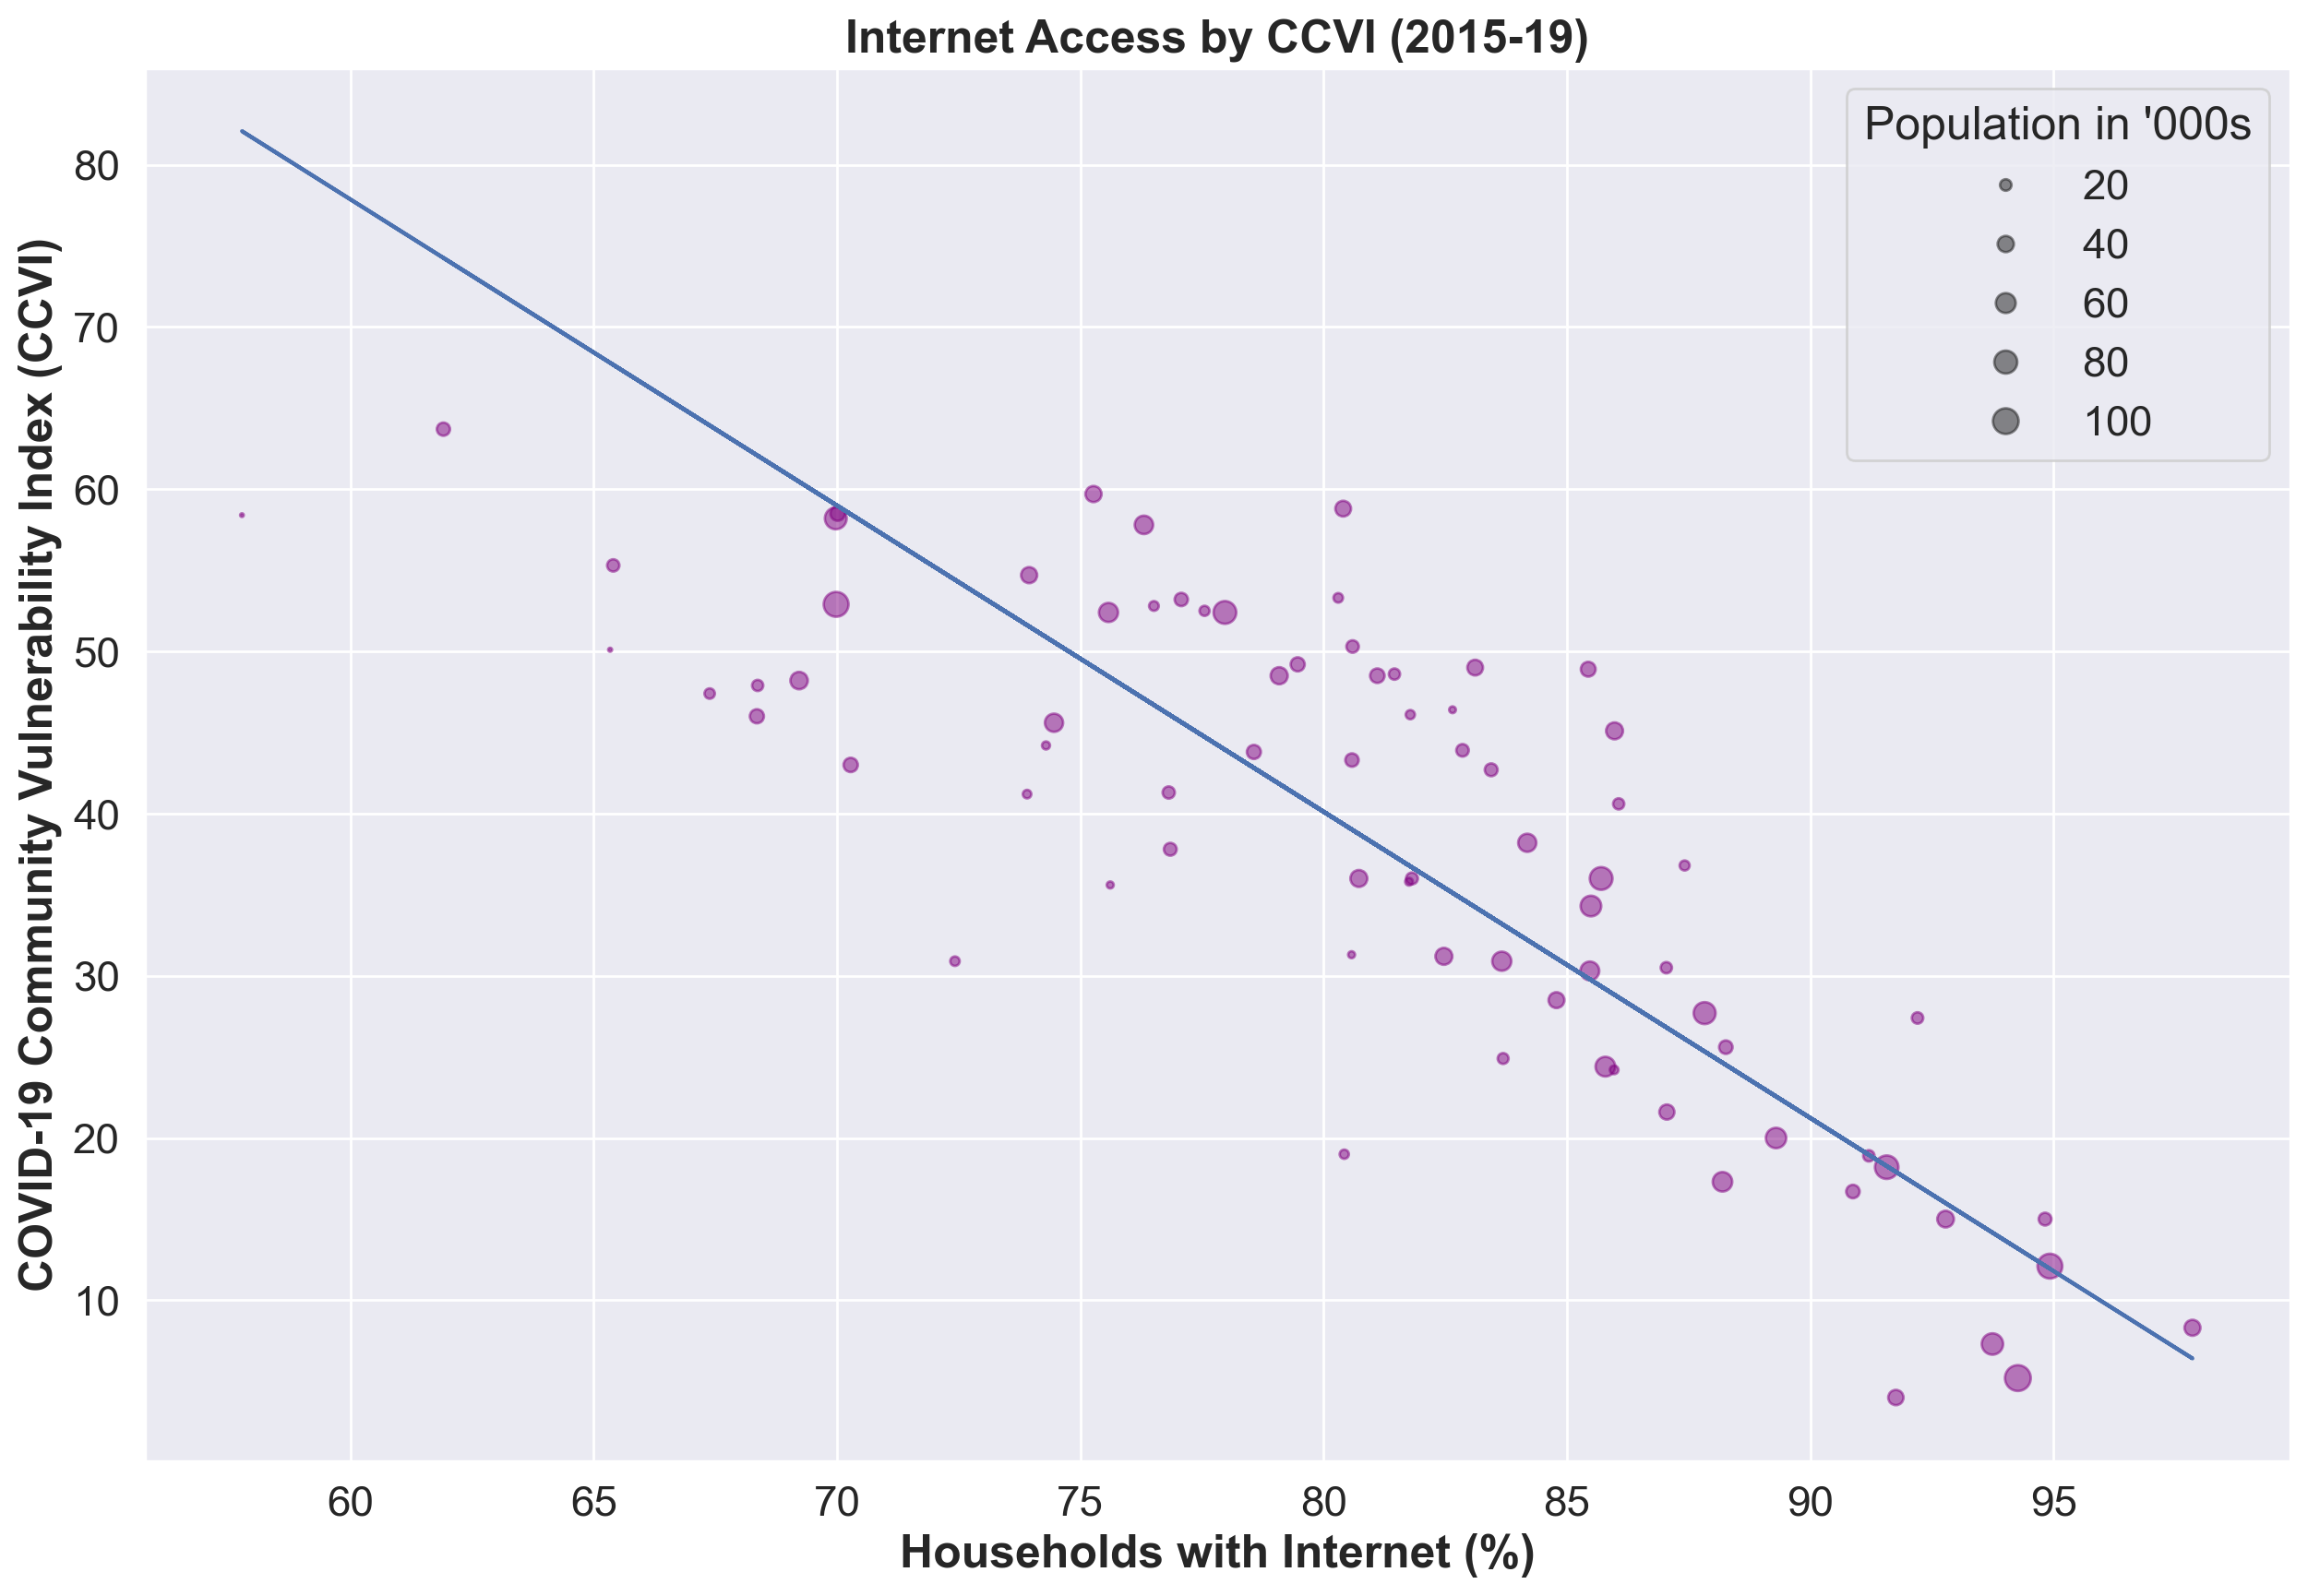

In [18]:
plt.figure(figsize=(15, 10), dpi=200)

x = 100-chicago_df["hh_no_internet(%)"]
y = chicago_df["ccvi_score"]

scatter = plt.scatter(x,y,c="purple", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("COVID-19 Community Vulnerability Index (CCVI)",weight = "bold")
plt.title("Internet Access by CCVI (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

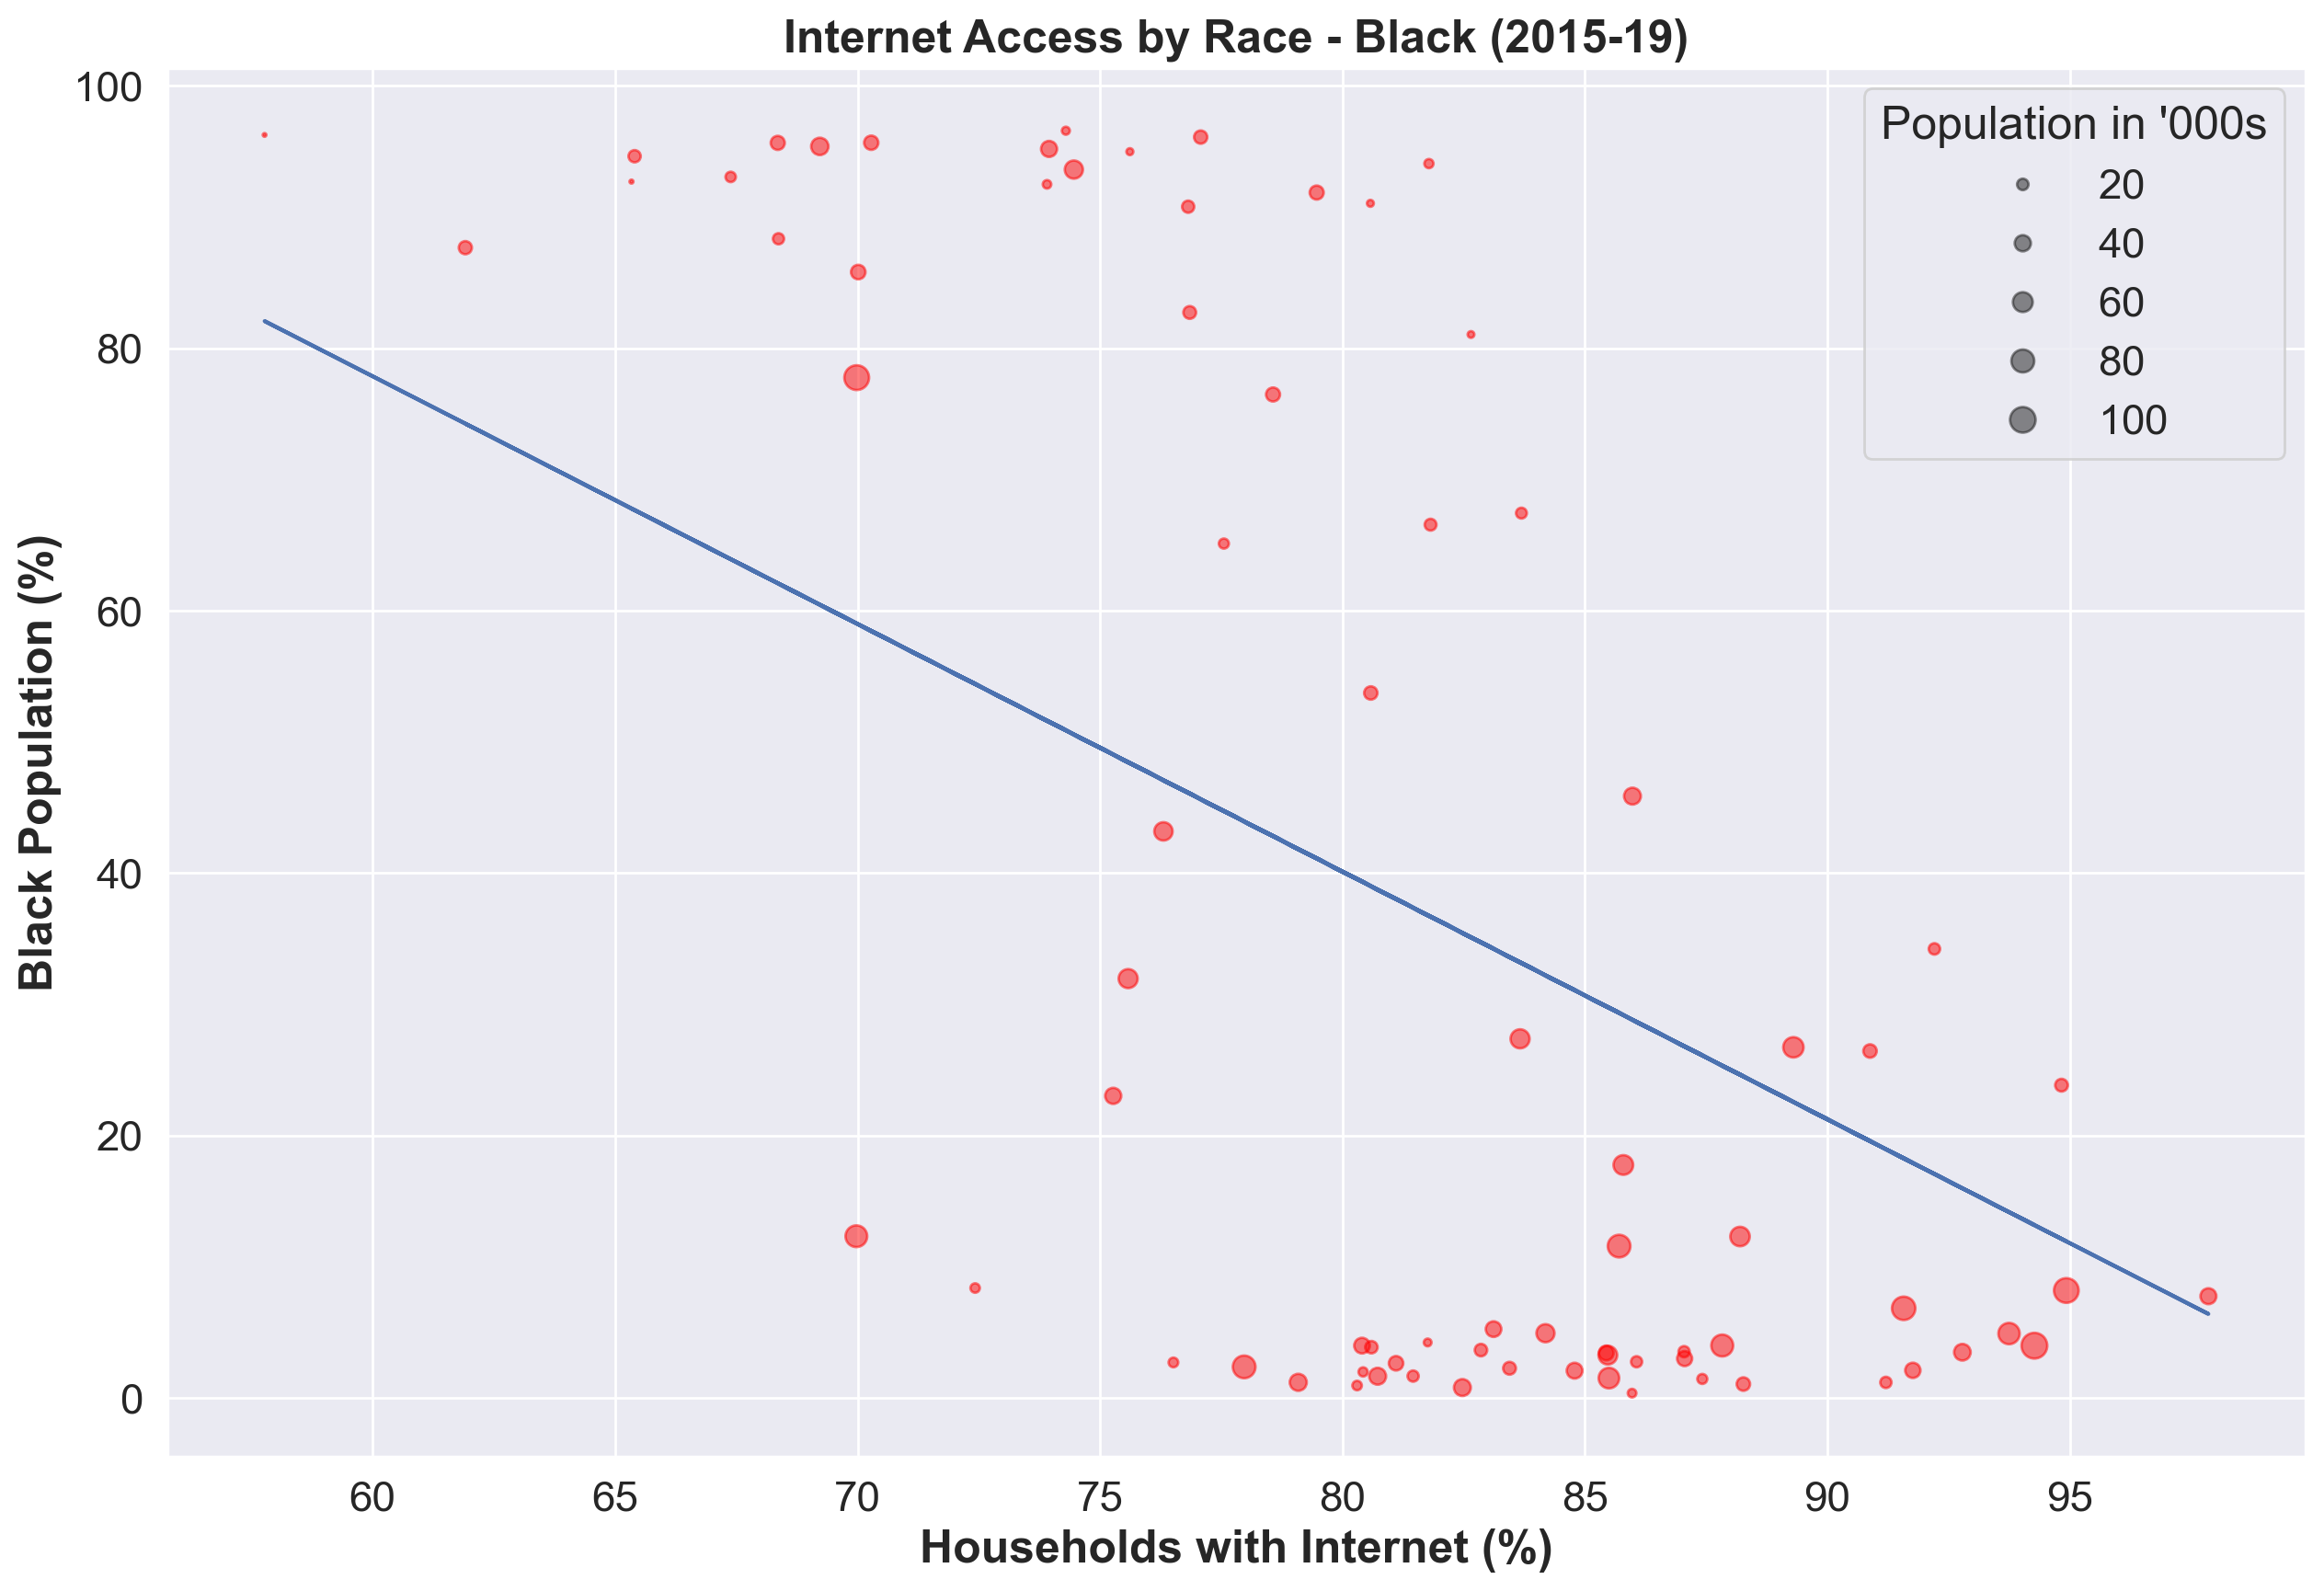

In [19]:
plt.figure(figsize=(15, 10), dpi=200)

scatter = plt.scatter(x=100 - chicago_df["hh_no_internet(%)"],
   y=chicago_df["total_black(%)"],
   c="red", alpha=0.5, s = chicago_df["total_pop"]/1000
   )

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)", weight = "bold")
plt.ylabel("Black Population (%)",weight = "bold")
plt.title("Internet Access by Race - Black (2015-19)",weight = "bold" )
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))